In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from math import sqrt

from wind_dir_classifier import load_netcdf
from models import data_prep, compile_and_fit, evaluate
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import LSTM
from keras.layers import Reshape
from keras.layers import TimeDistributed

In [44]:
# loading needed data
df = load_netcdf('C:/Studia/maciej-romanski/data/gaj_olawski')
df = df.drop(labels=['windspeed_10', 'windspeed_100'], axis=1)

c:\Studia\maciej-romanski\wind_dir_classifier.py:34: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(netCDF2df(path+'/'+filename),ignore_index=True)


In [45]:
df

,t2m,d2m,msl,tp,u10,v10,u100,v100,ssrd,Date Time
0,275.332254,274.286849,101918.532777,1.398094e-06,-1.308195,2.421520,-1.389204,5.839118,0.0,2014-01-01 00:00:00
1,275.114286,274.076596,101898.790426,2.019469e-06,-1.252865,2.336755,-1.228446,5.671462,0.0,2014-01-01 01:00:00
2,274.602475,273.536258,101880.919674,3.650579e-06,-1.325035,2.322301,-1.434733,5.689306,0.0,2014-01-01 02:00:00
3,274.942533,273.854905,101837.691774,7.068143e-06,-1.402016,2.482522,-1.513702,5.801944,0.0,2014-01-01 03:00:00
4,275.290868,274.053719,101794.644996,1.141777e-05,-1.651134,2.658668,-1.917815,5.919786,0.0,2014-01-01 04:00:00
...,...,...,...,...,...,...,...,...,...,...
70123,284.349792,281.137893,101546.254844,5.248368e-06,4.644590,1.443357,9.287128,2.075447,0.0,2021-12-31 19:00:00
70124,284.497001,281.261584,101575.888525,-8.673617e-19,4.889730,1.140718,9.594774,1.448919,0.0,2021-12-31 20:00:00
70125,284.358537,281.442320,101573.573393,2.385622e-06,5.258442,0.756196,10.112358,0.696116,0.0,2021-12-31 21:00:00
70126,284.420482,281.305074,101574.499446,1.700153e-04,6.211257,0.044142,11.046738,-0.504009,0.0,2021-12-31 22:00:00


In [46]:
X_train, y_train, X_test, y_test, scaler_y_u100 = data_prep(df, 2014, 2020, 2021, 2021, 24, 1, y_featurename='u100')

# defining models
model_u100 = Sequential([
    Dense(units=200, activation='relu', input_shape=(24, X_train.shape[2])),
    Dropout(0.2),
    Dense(units=200, activation='relu'),
    Dropout(0.2),
    Dense(units=200, activation='relu'),
    Dropout(0.2),
    Dense(1),
    Reshape([1,24]),
    Dense(1),
    Reshape([1])
])

compile_and_fit(model_u100, X_train, y_train)

X_train, y_train, X_test, y_test, scaler_y_v100 = data_prep(df, 2014, 2020, 2021, 2021, 24, 1, y_featurename='v100')

# defining models
model_v100 = Sequential([
    Dense(units=200, activation='relu', input_shape=(24, X_train.shape[2])),
    Dropout(0.2),
    Dense(units=200, activation='relu'),
    Dropout(0.2),
    Dense(units=200, activation='relu'),
    Dropout(0.2),
    Dense(1),
    Reshape([1,24]),
    Dense(1),
    Reshape([1])
])

compile_and_fit(model_v100, X_train, y_train)

Epoch 1/20
1917/1917 [==============================] - 12s 6ms/step - loss: 0.0051
Epoch 2/20
1917/1917 [==============================] - 11s 6ms/step - loss: 0.0019
Epoch 3/20
1917/1917 [==============================] - 11s 6ms/step - loss: 0.0014
Epoch 4/20
1917/1917 [==============================] - 11s 6ms/step - loss: 0.0011
Epoch 5/20
1917/1917 [==============================] - 11s 6ms/step - loss: 8.9183e-04
Epoch 6/20
1917/1917 [==============================] - 11s 6ms/step - loss: 8.1047e-04
Epoch 7/20
1917/1917 [==============================] - 11s 6ms/step - loss: 7.5865e-04
Epoch 8/20
1917/1917 [==============================] - 11s 6ms/step - loss: 7.1613e-04
Epoch 9/20
1917/1917 [==============================] - 11s 6ms/step - loss: 6.9260e-04
Epoch 10/20
1917/1917 [==============================] - 11s 6ms/step - loss: 6.8323e-04
Epoch 11/20
1917/1917 [==============================] - 11s 6ms/step - loss: 6.6282e-04
Epoch 12/20
1917/1917 [=======================

In [47]:
u_100 = model_u100.predict(X_test)
v_100 = model_v100.predict(X_test)
u_100 = scaler_y_u100.inverse_transform(u_100)
v_100 = scaler_y_v100.inverse_transform(v_100)


273/273 [==============================] - 1s 2ms/step


In [48]:
directions_pred = np.arctan2(v_100, u_100)

In [49]:
df['ws_100'] = np.sqrt(np.square(df['u100']) + np.square(df['v100']))
df['wd_100'] = np.arctan2(df['v100'], df['u100'])
df['ws_10'] = np.sqrt(np.square(df['u10']) + np.square(df['v10']))
df['wd_10'] = np.arctan2(df['v10'], df['u10'])
df = df.drop(labels=['v10', 'u10', 'v100', 'u100'], axis=1)

In [50]:
df

,t2m,d2m,msl,tp,ssrd,Date Time,ws_100,wd_100,ws_10,wd_10
0,275.332254,274.286849,101918.532777,1.398094e-06,0.0,2014-01-01 00:00:00,6.002099,1.804367,2.752297,2.066113
1,275.114286,274.076596,101898.790426,2.019469e-06,0.0,2014-01-01 01:00:00,5.802979,1.784102,2.651433,2.062949
2,274.602475,273.536258,101880.919674,3.650579e-06,0.0,2014-01-01 02:00:00,5.867424,1.817826,2.673724,2.089295
3,274.942533,273.854905,101837.691774,7.068143e-06,0.0,2014-01-01 03:00:00,5.996153,1.826003,2.851064,2.084897
4,275.290868,274.053719,101794.644996,1.141777e-05,0.0,2014-01-01 04:00:00,6.222691,1.884094,3.129658,2.126541
...,...,...,...,...,...,...,...,...,...,...
70123,284.349792,281.137893,101546.254844,5.248368e-06,0.0,2021-12-31 19:00:00,9.516209,0.219863,4.863692,0.301300
70124,284.497001,281.261584,101575.888525,-8.673617e-19,0.0,2021-12-31 20:00:00,9.703558,0.149879,5.021026,0.229189
70125,284.358537,281.442320,101573.573393,2.385622e-06,0.0,2021-12-31 21:00:00,10.136289,0.068730,5.312536,0.142827
70126,284.420482,281.305074,101574.499446,1.700153e-04,0.0,2021-12-31 22:00:00,11.058230,-0.045594,6.211414,0.007107


In [51]:
X_train, y_train, X_test, y_test, scaler_y_wd100 = data_prep(df, 2014, 2020, 2021, 2021, 24, 1, y_featurename='wd_100')

# defining models
model_wd100 = Sequential([
    Dense(units=200, activation='relu', input_shape=(24, X_train.shape[2])),
    Dropout(0.2),
    Dense(units=200, activation='relu'),
    Dropout(0.2),
    Dense(units=200, activation='relu'),
    Dropout(0.2),
    Dense(1),
    Reshape([1,24]),
    Dense(1),
    Reshape([1])
])

compile_and_fit(model_wd100, X_train, y_train)
wd_100 = model_wd100.predict(X_test)
wd_100 = scaler_y_wd100.inverse_transform(wd_100)
directions_true = scaler_y_wd100.inverse_transform(y_test)


Epoch 1/20
1917/1917 [==============================] - 14s 7ms/step - loss: 0.0318
Epoch 2/20
1917/1917 [==============================] - 12s 6ms/step - loss: 0.0152
Epoch 3/20
1917/1917 [==============================] - 12s 6ms/step - loss: 0.0132
Epoch 4/20
1917/1917 [==============================] - 12s 6ms/step - loss: 0.0124
Epoch 5/20
1917/1917 [==============================] - 12s 6ms/step - loss: 0.0120
Epoch 6/20
1917/1917 [==============================] - 12s 6ms/step - loss: 0.0118
Epoch 7/20
1917/1917 [==============================] - 12s 6ms/step - loss: 0.0117
Epoch 8/20
1917/1917 [==============================] - 13s 7ms/step - loss: 0.0116
Epoch 9/20
1917/1917 [==============================] - 12s 6ms/step - loss: 0.0116
Epoch 10/20
1917/1917 [==============================] - 13s 7ms/step - loss: 0.0114
Epoch 11/20
1917/1917 [==============================] - 12s 6ms/step - loss: 0.0113
Epoch 12/20
1917/1917 [==============================] - 12s 6ms/step - lo

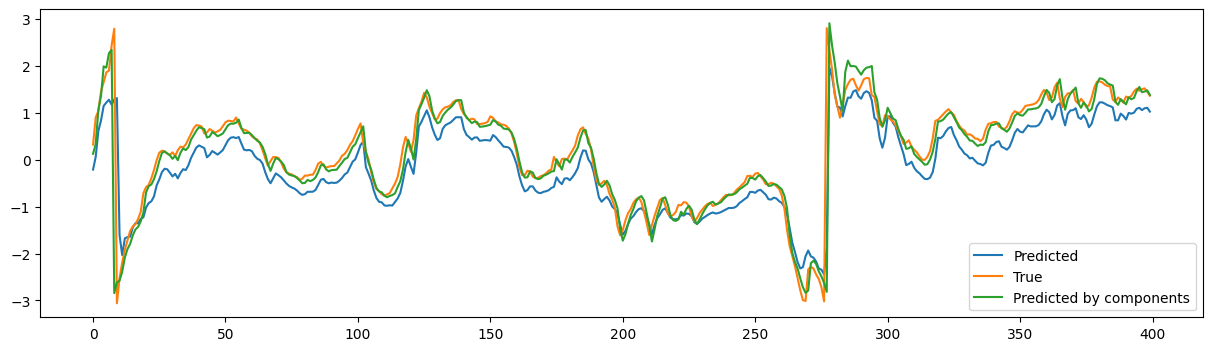

In [64]:
# mean = (wd_100 + directions_pred) / 2
plt.figure(figsize=(15,4))
plt.plot(wd_100[100:500])
plt.plot(directions_true[100:500])
plt.plot(directions_pred[100:500])
# plt.plot(mean[100:500])
plt.legend(['Predicted', 'True', 'Predicted by components'])
plt.show()

In [59]:
rmse_by_comp = sqrt(np.square((directions_true-directions_pred+np.pi)%(2*np.pi)-np.pi).mean())
rmse_direct = sqrt(np.square((directions_true-wd_100+np.pi)%(2*np.pi)-np.pi).mean())

In [60]:
print(rmse_by_comp, rmse_by_comp*180/np.pi)
print(rmse_direct, rmse_direct*180/np.pi)

0.32153331305349 18.422501810823636
0.5724427327310057 32.79855259842201


In [62]:
rmse_mean = sqrt(np.square((directions_true-mean+np.pi)%(2*np.pi)-np.pi).mean())

In [63]:
rmse_mean

0.4696100536063361